In [1]:
# Standard Data Science Helpers
import numpy as np
import scipy

import pandas as pd
import featuretools as ft

# Graphic libraries
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh');plt.rcParams['font.size']=18
import seaborn as sns

# Extra options 

pd.options.display.max_rows = 10
pd.set_option('max_columns', 100)

In [2]:
def ecdf_values(x):
    """Generate values for empirical cumulative distribution function
    
    Params
    --------
        x (array or list of numeric values): distribution for ECDF
    
    Returns
    --------
        x (array): x values
        y (array): percentile values
    """
    
    # Sort values and find length
    x = np.sort(x)
    n = len(x)
    # Create percentiles
    y = np.arange(1, n + 1, 1) / n
    return x, y

In [87]:
x = [32444, 12456, 14911,23064,27055,29427,47710,
     42322,51206,75041,67713]

xs, ys = ecdf_values(x)
ys

array([0.09090909, 0.18181818, 0.27272727, 0.36363636, 0.45454545,
       0.54545455, 0.63636364, 0.72727273, 0.81818182, 0.90909091,
       1.        ])

In [101]:
x = np.random.randn(100)
xs, ys = ecdf_values(x)

In [121]:
def ecdf_plot(x, name = 'Value', plot_normal = True):
    """ECDF plot of x
    Params
    --------
        x (array or list of numerics): distribution for ECDF
        name (str): name of the distribution, used for labeling
        plot_normal (bool): plot the normal distribution (from mean and std of data)
    
    Returns
    --------
        none, displays plot
    
    """
    xs, ys = ecdf_values(x)
    plt.figure(figsize = (10, 6))
    ax = plt.subplot(1, 1, 1)
    plt.step(xs, ys, linewidth = 2.5, c= 'b');
    
    if plot_normal:
        gxs, gys = ecdf_values(np.random.normal(loc = xs.mean(), scale = xs.std(), size = 100000))
        plt.plot(gxs, gys, 'g');

    if max(xs) < 0:
        right = 0.15 * abs(max(xs)) + max(xs)
    else:
        right = 1.15 * max(xs)

    gap = right - max(xs)
    left = min(xs) - gap    

    plt.vlines(x=min(xs), ymin=0, ymax=min(ys), color = 'b', linewidth = 2.5)
    plt.xticks(size = 16); plt.yticks(size = 16)
    plt.xlabel('Value', size = 18); plt.ylabel('Percentile', size = 18);

    plt.vlines(x=min(xs), ymin = min(ys), ymax=0.065, color = 'r', 
               linestyle = '-', alpha = 0.8, linewidth = 1.7)
    plt.vlines(x=max(xs), ymin=0.935, ymax=max(ys), color = 'r', 
               linestyle = '-', alpha = 0.8, linewidth = 1.7)

    plt.annotate(s = f'{min(xs):.2f}', xy = (min(xs), 0.065),
                horizontalalignment = 'center',
                verticalalignment = 'bottom',
                size = 15)
    plt.annotate(s = f'{max(xs):.2f}', xy = (max(xs), 0.935),
                horizontalalignment = 'center',
                verticalalignment = 'top',
                size = 15)
    
    ps = [0.25, 0.5, 0.75]

    for p in ps:

        ax.set_xlim(left = left, right = right)
        ax.set_ylim(bottom = 0)

        value = xs[np.where(ys > p)[0][0] - 1]
        pvalue = ys[np.where(ys > p)[0][0] - 1]

        plt.hlines(y=p, xmin=left, xmax = value,
                    linestyles = ':', colors = 'r', linewidth = 1.4);

        plt.vlines(x=value, ymin=0, ymax = pvalue, 
                   linestyles = ':', colors = 'r', linewidth = 1.4)

        text_position = (0.5 * value - abs(left), p)

        plt.text(x = p / 3, y = text_position[1], 
                 transform = ax.transAxes,
                 s = f'{int(100*p)}%', size = 15,
                 color = 'r', alpha = 0.7)

        plt.text(x = value + max(xs) / 60, y = 0.01, size = 15,
                 s = f'{value:.2f}', color = 'r', alpha = 0.8);

    plt.title('ECDF of Value', size = 20);

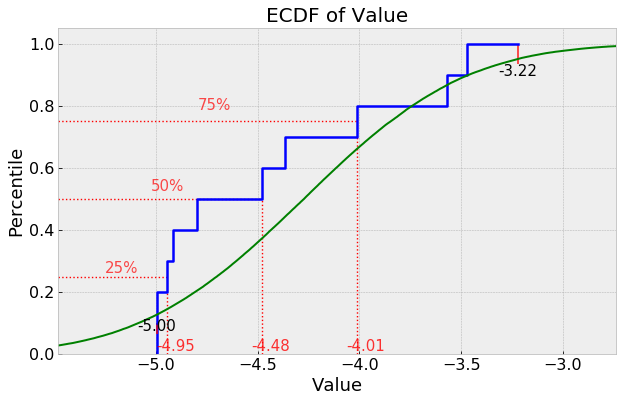

In [126]:
ecdf_plot(-5 - -1 * abs(np.random.randn(10)))

In [99]:
ax.get_xlim()[-1] - max(xs)

15008.199999999997

In [100]:
gap

15008.199999999997

In [ ]:
ax.transLimits()

In [66]:
ax.get_xlim()[-1] / max(xs)

1.0417005370397516

In [21]:
0.2 * min(xs) + min(xs)

-3.5067335248985496

In [19]:
min(xs)

-2.922277937415458

In [17]:
ax.get_xlim()

(-0.5844555874830916, 3.9148577895188095)

In [5]:
plt.rcParams.keys()

KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': '#bcbcbc',
          'axes.facecolor': '#eeeeee',
          'axes.formatter.limits': [-7, 7],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
    

In [ ]:
ax.xaxis.label.get_position()

In [ ]:
plt.figure(figsize = (10, 6))
ax = plt.subplot(1, 1, 1)
plt.step(xs, ys, linewidth = 2.5);
ps = [0.25, 0.50, 0.75]
for p in ps:
    value = xs[np.where(ys > p)[0][0] - 1]
    pvalue = ys[np.where(ys > p)[0][0] - 1]
    plt.axhline(y=p, xmax = value / max(xs),
                linestyle = ':', color = 'r', linewidth = 1.4);
    plt.axvline(x=value, ymax = pvalue, 
               linestyle = ':', color = 'r', linewidth = 1.4)
    text_position = (0.25 * value / ax.get_xlim()[-1], p)
    plt.text(x = text_position[0], y = text_position[1], 
             transform=ax.transAxes,
             s = f'{p}%', size = 14,
             color = 'r', alpha = 0.7)
    break
    
plt.xticks(size = 16); plt.yticks(size = 16)
plt.xlabel('Value', size = 18); plt.ylabel('Percentile', size = 18);

In [ ]:
value

In [ ]:
ax.get_xlim()[-1]

In [ ]:
value / max(xs)

In [ ]:
value / ax.get_xlim()[-1]

In [ ]:
text_position

In [ ]:
pvalue

In [ ]:
value / ax.get_xlim()[-1]